In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Conv2D, MaxPool2D,MaxPooling2D, Dropout, Dense, Flatten


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

In [2]:
train_path = r'E:\Intern\Flower kath golap\train'
test_path = r'E:\Intern\Flower kath golap\test'
val_path = r'E:\Intern\Flower kath golap\valid'

Bloom


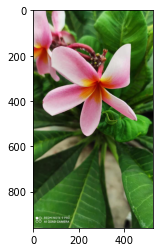

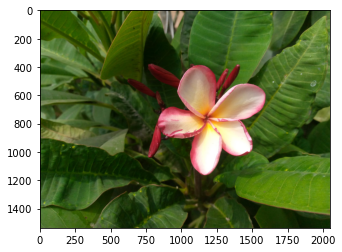

Post Bloom


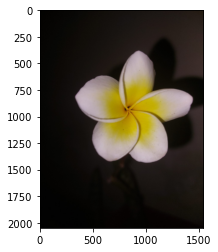

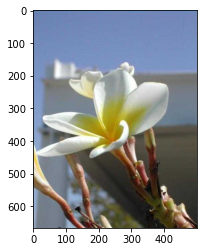

Pre Bloom


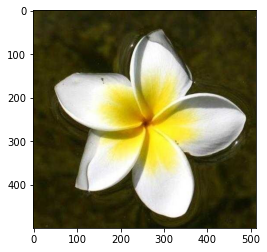

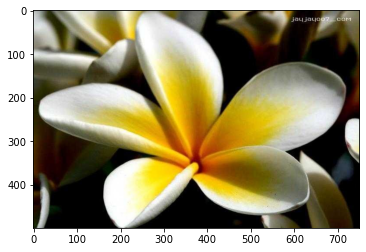

In [30]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

In [31]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+ "/" +img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [64]:
size = (250,250)

In [65]:
train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

In [66]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [67]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

In [68]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [69]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 30 images belonging to 3 classes.
Found 31 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [70]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [71]:
train_class.class_indices

{'Bloom': 0, 'Post Bloom': 1, 'Pre Bloom': 2}

In [72]:
y_train.shape,y_test.shape,y_val.shape

((30,), (31,), (30,))

In [73]:
""""#x2
model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (250,250,3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(128, activation = 'relu'))
model3.add(Dense(25, activation = 'softmax')) """

model3 = Sequential()
model3.add(Conv2D(filters=64,padding='same',kernel_size=(3,3),activation='relu',input_shape=(250,250,3)))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())
model3.add(Dense(128,activation='relu'))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(rate=0.5))
model3.add(Dense(5,activation='softmax'))

In [74]:
cnn=model3

In [75]:
for layer in cnn.layers:
    layer.trainable = False

x = Flatten()(cnn.output)
prediction = Dense(3, activation='softmax')(x)

model3 = Model(inputs=cnn.input, outputs=prediction)
model3.summary()



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9_input (InputLayer)  [(None, 250, 250, 3)]    0         
                                                                 
 conv2d_9 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 124, 124, 32)      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 61, 61, 64)       0         
 g2D)                                                      

In [76]:
#If your targets are one-hot encoded, use categorical_crossentropy. Examples of one-hot encodings:
# If your targets are integers, use sparse_categorical_crossentropy. 

#model1.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics =['acc'])
#model3.compile(loss ='categorical_crossentropy', optimizer='adam',metrics =['acc'])
#model3.summary()
model3.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
#Training the CNN model1
#history = model3.fit(X_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (X_test, y_test))
#history3 = model3.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_val, y_val))

history3 = model3.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10,batch_size = 28,shuffle=True)

Epoch 1/10


In [ ]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

In [ ]:
#x
vgg2 = VGG16(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False) 

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

model1 = Model(inputs=vgg.input, outputs=prediction)
model1.summary()



In [ ]:
#x
for layer in vgg2.layers:
    layer.trainable = False

x = Flatten()(vgg2.output)
prediction = Dense(3, activation='softmax')(x)

model2 = Model(inputs=vgg2.input, outputs=prediction)
model2.summary()



In [ ]:
model1.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
import visualkeras
visualkeras.layered_view(model1)

In [ ]:
#x
model2.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

In [ ]:
import visualkeras
visualkeras.layered_view(model2)

In [ ]:
# Fit
history1 = model1.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10,batch_size = 30,
                    shuffle=True)

In [ ]:
#x
# Fit
history2 = model2.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10,batch_size = 30,
                    shuffle=True)

In [ ]:
#x
model1.save(r'D:\university\Thesis\final\Flower kath golap\saved model')

In [ ]:
#x
model2.save(r'D:\university\Thesis\final\Flower kath golap\saved model')

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(history1.history['accuracy'], label='train acc')
plt.plot(history1.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

In [ ]:
#X
plt.figure(figsize=(10, 8))
plt.plot(history2.history['accuracy'], label='train acc')
plt.plot(history2.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()